# PCA Analysis for Visualization of per 100 possession  NBA data

Through Basketball Reference tracks boxscore metrics in terms of a per 100 possession rate rather than by per game. This might make it easier to compare season performances from players playing in different eras. Popularized by Mike D'Antoni's up-tempo and spread out offence, the modern NBA offence has seen an explosion in the volume of shots taken each game, especially beyond the arc. Pace of play is much faster now than what it was even 10 years ago, making it extremely difficult to compare players from different eras. One stat that might allow us to better compare players under different offence styles is the per 100 possession metric. This metric in some form standardizes each player's opportunity to fill the stat sheet, by exactly measuring how well players perform per 100 possessions.   

In [372]:
# --> Import Libraries
import numpy as np
import pandas as pd


# --> Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# --> ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [373]:
merged_dat = pd.read_csv('Clean_All_NBA_Data.csv')

# --> Change column name
merged_dat.rename(columns={"Win_Prop": "Team Performance"}, inplace = True)

In [374]:
merged_dat

,Season,Player,PlayerId,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Year,key_id,All_NBA_Team,All_NBA_Flag,All_NBA_Pos,Tm_id,Team30,Team Performance
0,1988-89,Kareem Abdul-Jabbar,abdulka01,C,41,LAL,74,74,1695,8.9,18.6,0.475,0.0,0.1,0.000,8.9,18.6,0.477,3.5,4.7,0.739,2.9,6.5,9.4,2.1,1.1,2.4,2.7,5.5,21.2,104.0,107.0,1989,Kareem Abdul-Jabbar-1989,0.0,Not Selected,Center,LAL1988-89,LAL,0.055610
1,1988-89,Mark Acres,acresma01,C,26,BOS,62,0,632,4.3,8.8,0.482,0.1,0.1,1.000,4.2,8.7,0.478,2.0,3.7,0.542,4.6,6.7,11.3,1.5,1.5,0.5,1.8,7.3,10.6,108.0,110.0,1989,Mark Acres-1989,0.0,Not Selected,Center,BOS1988-89,BOS,0.040976
2,1988-89,Michael Adams,adamsmi01,PG,26,DEN,77,77,2787,7.5,17.3,0.433,2.7,7.5,0.356,4.8,9.9,0.490,5.2,6.3,0.819,1.1,3.4,4.5,7.8,2.7,0.2,2.9,2.4,22.8,115.0,108.0,1989,Michael Adams-1989,0.0,Not Selected,Guard,DEN1988-89,DEN,0.042927
3,1988-89,Mark Aguirre,aguirma01,SF,29,TOT,80,76,2597,11.3,24.5,0.461,1.0,3.4,0.293,10.3,21.2,0.488,5.6,7.6,0.733,2.8,4.6,7.5,5.4,0.9,0.7,4.0,4.4,29.2,105.0,110.0,1989,Mark Aguirre-1989,0.0,Not Selected,Forward,TOT1988-89,TOT,0.033333
4,1988-89,Danny Ainge,aingeda01,PG,29,TOT,73,54,2377,9.8,21.4,0.457,2.4,6.2,0.380,7.4,15.2,0.488,4.2,4.9,0.854,1.4,3.7,5.2,8.2,1.9,0.2,3.0,3.8,26.1,116.0,111.0,1989,Danny Ainge-1989,0.0,Not Selected,Guard,TOT1988-89,TOT,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13755,2018-19,Trae Young,youngtr01,PG,20,ATL,81,81,2503,9.7,23.2,0.418,2.9,8.9,0.324,6.8,14.3,0.477,6.3,7.6,0.829,1.2,4.4,5.6,12.1,1.3,0.3,5.7,2.6,28.6,107.0,117.0,2019,Trae Young-2019,0.0,Not Selected,Guard,ATL2018-19,ATL,0.023577
13756,2018-19,Cody Zeller,zelleco01,C,26,CHO,49,47,1243,7.4,13.5,0.551,0.2,0.9,0.273,7.2,12.6,0.570,4.3,5.5,0.787,4.3,8.7,13.0,4.0,1.5,1.6,2.4,6.4,19.4,123.0,111.0,2019,Cody Zeller-2019,0.0,Not Selected,Center,CHO2018-19,CHO,0.031707
13757,2018-19,Tyler Zeller,zellety01,C,29,TOT,6,1,93,8.5,15.9,0.533,0.0,0.5,0.000,8.5,15.4,0.552,7.4,9.5,0.778,5.8,6.9,12.7,2.1,0.5,1.6,2.1,10.6,24.4,123.0,111.0,2019,Tyler Zeller-2019,0.0,Not Selected,Center,TOT2018-19,TOT,0.033333
13758,2018-19,Ante Žižić,zizican01,C,22,CLE,59,25,1082,8.4,15.2,0.553,0.0,0.0,0.000,8.4,15.2,0.553,4.3,6.1,0.705,5.0,9.7,14.7,2.4,0.6,1.0,2.8,5.2,21.1,116.0,117.0,2019,Ante Žižić-2019,0.0,Not Selected,Center,CLE2018-19,CLE,0.015447


Many continuous variables to consider!

In [390]:
merged_dat.shape

(8729, 40)

In [391]:
# Lets consider players who played a threshold number of games and minutes/game
threshold = 10
merged_dat = merged_dat[ ( (merged_dat["G"]) > threshold ) & ( (merged_dat["MP"]/merged_dat["G"]) > 15 )]

merged_dat.shape

(8729, 40)

In [392]:
# We don't wanna mess around with aliases, so lets work on a copy instead
copycat_dat = merged_dat.copy()


# PCA only works on continuous variables
cont_features = copycat_dat.select_dtypes(include=['float64', "int64"])

# Year and all nba flag are not if interest
cont_features.drop(["Year","All_NBA_Team", "G", "GS", 'Team Performance'], axis = 1, inplace= True)

# --> Replace all NaNs with 0s (NaN on 3P% means no 3s attempted)
cont_features.fillna(0, inplace=True)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [393]:
cont_features

,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,41,1695,8.9,18.6,0.475,0.0,0.1,0.000,8.9,18.6,0.477,3.5,4.7,0.739,2.9,6.5,9.4,2.1,1.1,2.4,2.7,5.5,21.2,104.0,107.0
2,26,2787,7.5,17.3,0.433,2.7,7.5,0.356,4.8,9.9,0.490,5.2,6.3,0.819,1.1,3.4,4.5,7.8,2.7,0.2,2.9,2.4,22.8,115.0,108.0
3,29,2597,11.3,24.5,0.461,1.0,3.4,0.293,10.3,21.2,0.488,5.6,7.6,0.733,2.8,4.6,7.5,5.4,0.9,0.7,4.0,4.4,29.2,105.0,110.0
4,29,2377,9.8,21.4,0.457,2.4,6.2,0.380,7.4,15.2,0.488,4.2,4.9,0.854,1.4,3.7,5.2,8.2,1.9,0.2,3.0,3.8,26.1,116.0,111.0
5,25,1141,8.6,18.0,0.478,0.5,1.6,0.342,8.1,16.4,0.491,3.0,3.6,0.839,4.3,6.3,10.6,2.6,1.0,0.9,2.6,6.7,20.8,109.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,30,2489,8.7,16.5,0.527,1.0,2.9,0.349,7.7,13.7,0.564,1.7,2.7,0.644,3.8,6.5,10.3,4.0,2.4,0.7,2.4,3.8,20.1,113.0,106.0
13755,20,2503,9.7,23.2,0.418,2.9,8.9,0.324,6.8,14.3,0.477,6.3,7.6,0.829,1.2,4.4,5.6,12.1,1.3,0.3,5.7,2.6,28.6,107.0,117.0
13756,26,1243,7.4,13.5,0.551,0.2,0.9,0.273,7.2,12.6,0.570,4.3,5.5,0.787,4.3,8.7,13.0,4.0,1.5,1.6,2.4,6.4,19.4,123.0,111.0
13758,22,1082,8.4,15.2,0.553,0.0,0.0,0.000,8.4,15.2,0.553,4.3,6.1,0.705,5.0,9.7,14.7,2.4,0.6,1.0,2.8,5.2,21.1,116.0,117.0


## PCA Time

In [394]:
# --> Standardize the Data
# Normalize data, to ensure all columns have mean 0 and sd 1.
scaler = StandardScaler()
scaler.fit(cont_features)
x = scaler.transform(cont_features)

In [395]:
# Create array of integers denoting the number of PC Components to retain
num_components = 8
num = np.array(range(num_components)) + 1

# Convert each element of array to string
num = [",".join(item) for item in num.astype(str)]
pc_column_names = ','.join(['PC' + i for i in num]).split(",")

# -- > Fit PCA on data
pca = PCA(n_components=num_components)
principalComponents = pca.fit_transform(x)

# --> Organize results into dataframe
principalDf = pd.DataFrame(data = principalComponents,
             columns = pc_column_names)

### Scree Plot (w/ Seaborn)

Text(0.5, 1.0, 'PCA per 100 possessions Scree Plot')

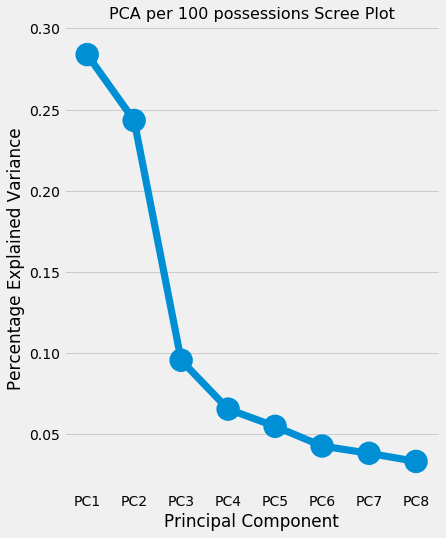

In [396]:
plt.figure(figsize=(6, 8))

scree_dat = pd.DataFrame( {'Percentage Explained Variance':pca.explained_variance_ratio_,
                           "Principal Component":pc_column_names} )
#sns.barplot
scree_plot = sns.pointplot(y = scree_dat['Percentage Explained Variance'], x = scree_dat['Principal Component'],)
scree_plot.set_title(label = "PCA per 100 possessions Scree Plot", fontsize=16)

#plt.savefig("allnba_screeplot.png", bbox_inches='tight')
#plt.show()

In [397]:
scree_dat

,Percentage Explained Variance,Principal Component
0,0.283845,PC1
1,0.243251,PC2
2,0.095544,PC3
3,0.065434,PC4
4,0.054823,PC5
5,0.042709,PC6
6,0.038226,PC7
7,0.033212,PC8


In [398]:
np.sum(pca.explained_variance_ratio_)
#pca.explained_variance_ratio_

0.857043353063786

How much of the total variation does each principal component capture from the data? The first two capture the most variation at 26.5% and 24.3% respectively. With 8 principal components, we capture just a shade below 85% of the total variation.

In [399]:
# Let's focus on the first two Principal Components:
pca2 = PCA(n_components=2)
pca2.fit(x)

x_pca = pca2.transform(x)


In [400]:
x_pca.shape
x.shape
cont_features.shape
merged_dat.shape
merged_dat.columns
x.shape

(8729, 25)

### PC Loadings plot

How strongly does each continuous variable influence the first two principal components? For the loadings plot, we simply graphs the coefficient of each feature for the first component versus the coefficient for the second component.

In [387]:
#loadings = pd.DataFrame(pca2.components_.T, columns=['PC1', 'PC2'], index=cont_features.columns)
loadings = pd.DataFrame({"PC1": pca2.components_.T[:,0],
                         "PC2": pca2.components_.T[:,1], 
                         "Feature": cont_features.columns})

In [388]:
loadings

,PC1,PC2,Feature
0,-0.040211,-0.037599,Age
1,0.063746,0.198953,MP
2,0.148857,0.342785,FG
3,0.042378,0.361594,FGA
4,0.274214,-0.012913,FG%
5,-0.268817,0.122513,3P
6,-0.275654,0.124864,3PA
7,-0.227460,0.152246,3P%
8,0.270700,0.241239,2P
9,0.231704,0.253752,2PA


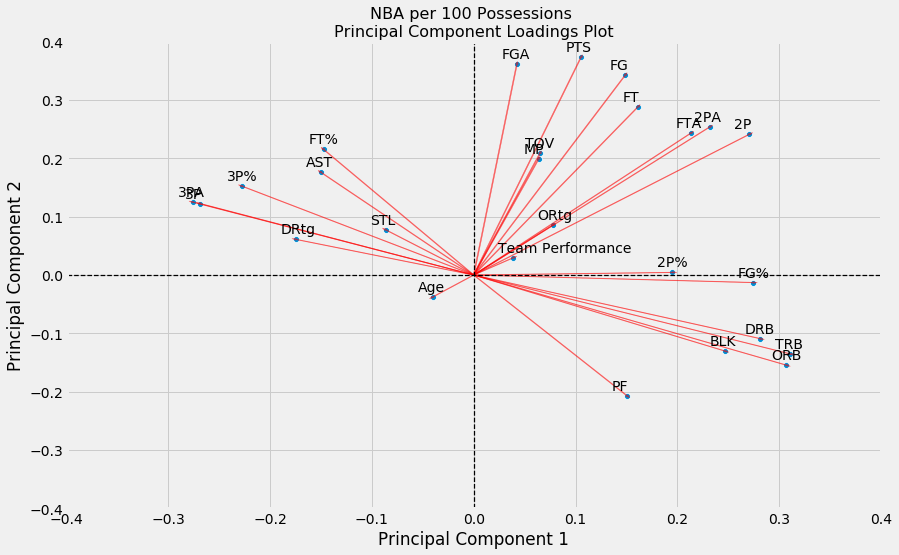

In [389]:
# Set size of figure:
plt.figure(figsize=(13,8))

loadings_plot = sns.scatterplot(x = 'PC1', # Horizontal axis
           y = 'PC2', # Vertical axis
           data=loadings) # Data source

# Labels
loadings_plot.set(xlabel='Principal Component 1', 
                  ylabel='Principal Component 2')
loadings_plot.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

# --> Point labels (features)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.015, point['y'] + 0.01, str(point['val']))
label_point(loadings.PC1, loadings.PC2, loadings.Feature, plt.gca())

# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
plt.xlim(-0.4, 0.4)   
plt.ylim(-0.4, 0.4)  

# Add loading vectors 
n = loadings.shape[0]
for i in range(n):
    plt.arrow(0, 0,loadings.PC1[i], loadings.PC2[i],color = 'r',alpha = 0.5, )


#plt.savefig("allnba_loadingsplot.png", bbox_inches='tight')
#plt.show()

## Biplot

The biplot overlays the score plot and the loading plot

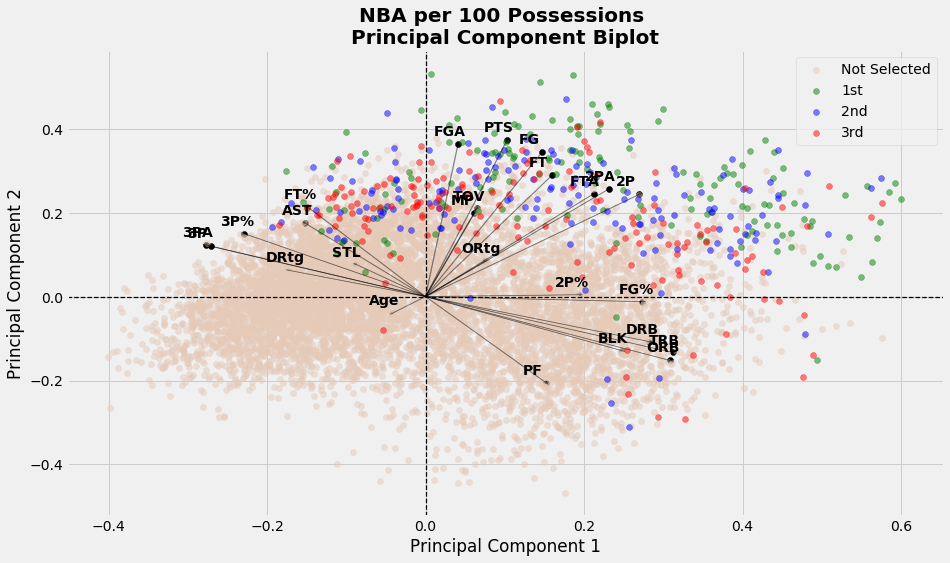

In [335]:
# Set size of figure:
plt.figure(figsize=(14,8))


# Plot Loading Vectors
plt.scatter(x = loadings['PC1'],
            y = loadings['PC2'], c = "black")

# Add loading vectors 
n = loadings.shape[0]
for i in range(n):
    plt.arrow(0, 0,loadings.PC1[i], loadings.PC2[i],color = 'r',alpha = 0.35, shape = "full",
              fc = "black",ec="black")

# --> Point labels (features)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.03, point['y'] + 0.02, str(point['val']), fontsize = 14,fontweight='bold')
label_point(loadings.PC1, loadings.PC2, loadings.Feature, plt.gca())




############################################################################################
# Plot PC Scores
xs = x_pca[:,0]
ys = x_pca[:,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())


team = ["Not Selected", "1st", "2nd", "3rd"]
cols = ["#E5CAB8","green", "blue", "red"]

for index in range(len(team)):
    x_to_plot = xs[merged_dat["All_NBA_Flag"] == team[index] ]
    y_to_plot = ys[merged_dat["All_NBA_Flag"] == team[index] ]
    plt.scatter(x = x_to_plot*scalex, y = y_to_plot*scaley,
               alpha = 0.5, c = cols[index], label = team[index])
    


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 0.4)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA per 100 Possessions \nPrincipal Component Biplot", fontsize=20, fontweight='bold')
#plt.set(xlabel='Principal Component 1', 
#                  ylabel='Principal Component 2')
#plt.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

#########################################################
# --> Add legend
plt.legend()


#plt.savefig("allnba_biplot.png", bbox_inches='tight')
#plt.show()

In [350]:
guard_index = merged_dat['All_NBA_Pos'] == "Guard"
forward_index =merged_dat['All_NBA_Pos'] == "Forward"
center_index = merged_dat['All_NBA_Pos'] == "Center"

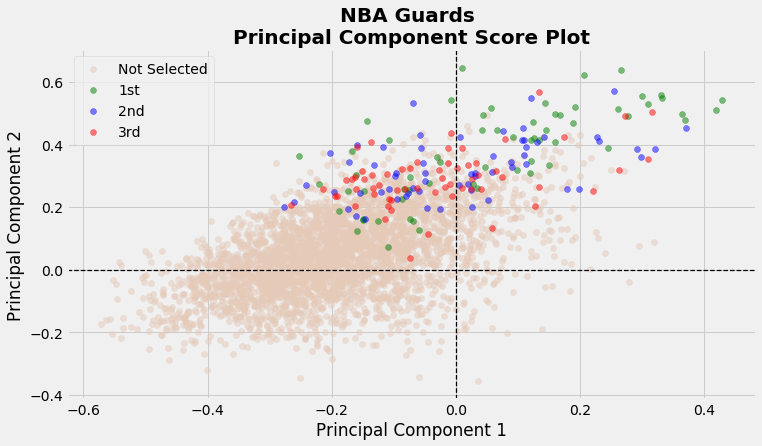

In [351]:
### Guards
plt.figure(figsize=(11,6))

guard_dat = merged_dat[guard_index]
############################################################################################
# Plot PC Scores
xs = x_pca[guard_index,0]
ys = x_pca[guard_index,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())


team = ["Not Selected", "1st", "2nd", "3rd"]
cols = ["#E5CAB8","green", "blue", "red"]

for index in range(len(team)):
    x_to_plot = xs[guard_dat["All_NBA_Flag"] == team[index] ]
    y_to_plot = ys[guard_dat["All_NBA_Flag"] == team[index] ]
    plt.scatter(x = x_to_plot*scalex, y = y_to_plot*scaley,
               alpha = 0.5, c = cols[index], label = team[index])
    


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 0.4)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA Guards \nPrincipal Component Score Plot", fontsize=20, fontweight='bold')
#plt.set(xlabel='Principal Component 1', 
#                  ylabel='Principal Component 2')
#plt.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

#########################################################
# --> Add legend
plt.legend()

plt.savefig("guards_biplot.png", bbox_inches='tight')
plt.show()

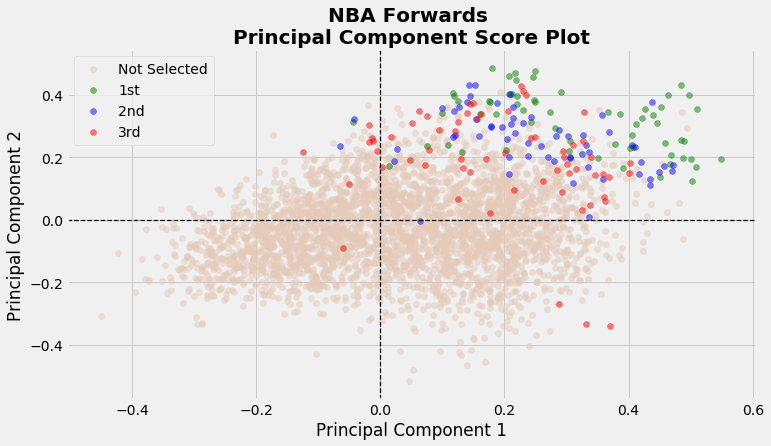

In [352]:

### Forwards
plt.figure(figsize=(11,6))


forward_dat = merged_dat[forward_index]
############################################################################################
# Plot PC Scores
xs = x_pca[forward_index,0]
ys = x_pca[forward_index,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())


team = ["Not Selected", "1st", "2nd", "3rd"]
cols = ["#E5CAB8","green", "blue", "red"]

for index in range(len(team)):
    x_to_plot = xs[forward_dat["All_NBA_Flag"] == team[index] ]
    y_to_plot = ys[forward_dat["All_NBA_Flag"] == team[index] ]
    plt.scatter(x = x_to_plot*scalex, y = y_to_plot*scaley,
               alpha = 0.5, c = cols[index], label = team[index])
    


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 0.4)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA Forwards \nPrincipal Component Score Plot", fontsize=20, fontweight='bold')
#plt.set(xlabel='Principal Component 1', 
#                  ylabel='Principal Component 2')
#plt.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

#########################################################
# --> Add legend
plt.legend()


plt.savefig("forward_biplot.png", bbox_inches='tight')
plt.show()

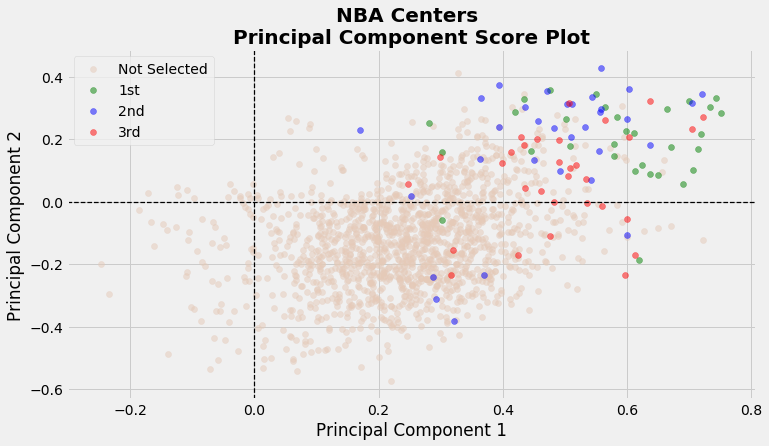

In [353]:
### Centers
plt.figure(figsize=(11,6))


center_dat = merged_dat[center_index]
############################################################################################
# Plot PC Scores
xs = x_pca[center_index,0]
ys = x_pca[center_index,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())


team = ["Not Selected", "1st", "2nd", "3rd"]
cols = ["#E5CAB8","green", "blue", "red"]

for index in range(len(team)):
    x_to_plot = xs[center_dat["All_NBA_Flag"] == team[index] ]
    y_to_plot = ys[center_dat["All_NBA_Flag"] == team[index] ]
    plt.scatter(x = x_to_plot*scalex, y = y_to_plot*scaley,
               alpha = 0.5, c = cols[index], label = team[index])
    


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 0.4)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA Centers \nPrincipal Component Score Plot", fontsize=20, fontweight='bold')
#plt.set(xlabel='Principal Component 1', 
#                  ylabel='Principal Component 2')
#plt.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

#########################################################
# --> Add legend
plt.legend()

plt.savefig("center_biplot.png", bbox_inches='tight')
plt.show()

# Appendix


### Heat Map of Continuous Variables

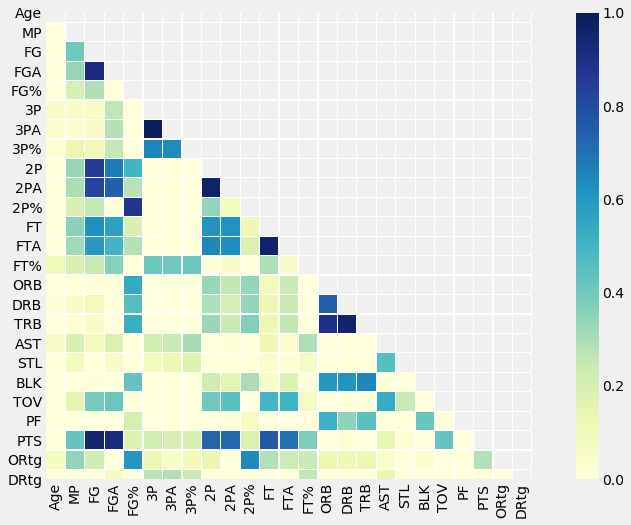

In [354]:
### We have multiple interesting continuos variables to look at. Are some more correlated to each other than others?
# Set size of image:
plt.figure(figsize=(14, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cont_features.corr(), dtype=np.bool))

sns.heatmap(cont_features.corr(), vmin=0, vmax=1,
            linewidths=.25, cmap="YlGnBu", square=True, mask = mask)
# annot = True
# fmt='.1g'

plt.savefig("corr_plot.png", bbox_inches='tight')
plt.show()

We see some obvious correlations like Total Rebounds (TRB) being correlated with Offensive Rebounds (ORB) and Deffensive Rebounds (DRB). Also, the amount of shots made increase a we have more shot attempts (i.e. as FGA increases, FG will tend to increase as well.)


### PCA Biplot including only players who made All-NBA

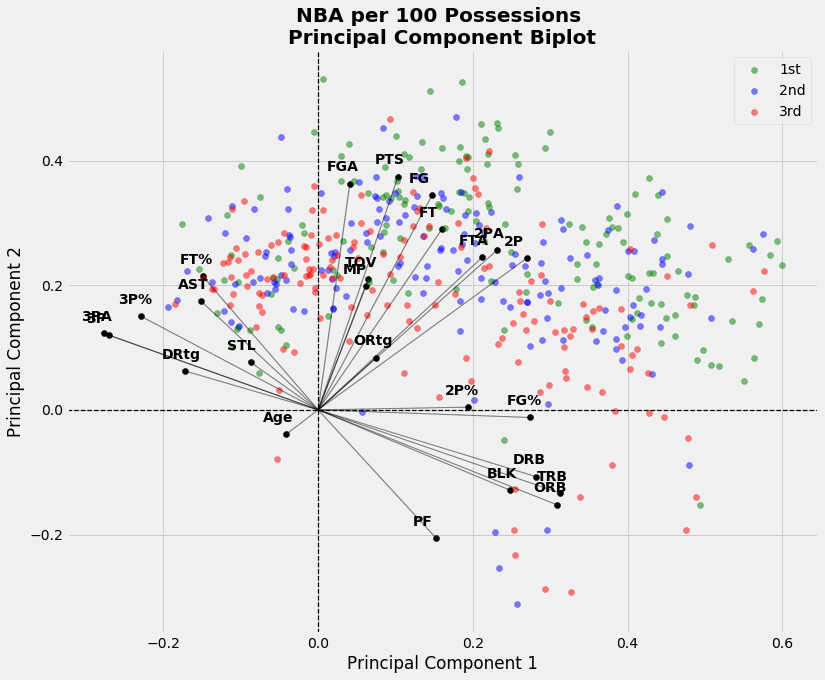

In [355]:
# Set size of figure:
plt.figure(figsize=(12,10))

plt.scatter(x = loadings['PC1'],
            y = loadings['PC2'], c = "black")

# Add loading vectors 
n = loadings.shape[0]
for i in range(n):
    plt.arrow(0, 0,loadings.PC1[i], loadings.PC2[i],color = 'r',alpha = 0.35, shape = "full",
              fc = "black",ec="black")

# --> Point labels (features)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.03, point['y'] + 0.02, str(point['val']), fontsize = 14,fontweight='bold')
label_point(loadings.PC1, loadings.PC2, loadings.Feature, plt.gca())

##########################################################

xs = x_pca[:,0]
ys = x_pca[:,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())


team = ["1st", "2nd", "3rd"]
cols = ["green", "blue", "red"]

for index in range(len(team)):
    x_to_plot = xs[merged_dat["All_NBA_Flag"] == team[index] ]
    y_to_plot = ys[merged_dat["All_NBA_Flag"] == team[index] ]
    plt.scatter(x = x_to_plot*scalex, y = y_to_plot*scaley,
               alpha = 0.5, c = cols[index], label = team[index])
    


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.25)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.25)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 0.4)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA per 100 Possessions \nPrincipal Component Biplot", fontsize=20, fontweight='bold')
#plt.set(xlabel='Principal Component 1', 
#                  ylabel='Principal Component 2')
#plt.set_title(label = "NBA per 100 Possessions \nPrincipal Component Loadings Plot", fontsize=16)

#########################################################
# --> Add legend
plt.legend()


In [356]:
# For players changing teams, how are they coded?
#per_100_poss.groupby(["Player", "Year"]).count()
pd.set_option('display.max_columns', 50)
np.sort(per_100_poss.Tm.unique())

array(['ATL', 'BOS', 'BRK', 'CHA', 'CHH', 'CHI', 'CHO', 'CLE', 'DAL',
       'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA',
       'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL',
       'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'TOT', 'UTA',
       'VAN', 'WAS', 'WSB'], dtype=object)

In [357]:
# Calculate distance from origin of PC scores

xs = x_pca[:,0]
ys = x_pca[:,1]
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())



x_dist = np.power(xs, 2) * scalex
y_dist = np.power(ys, 2) * scaley
dist = np.sqrt(x_dist + y_dist)
Distance_from_origin = pd.DataFrame({'Distance': dist, 'Player': merged_dat['Player'],
                                    'Year': merged_dat['Year'], 'All_NBA_Flag': merged_dat['All_NBA_Flag'],
                                    'Position': merged_dat['All_NBA_Pos']})

In [358]:
Distance_from_origin.head(5)

,Distance,Player,Year,All_NBA_Flag,Position
0,0.555435,Kareem Abdul-Jabbar,1989,Not Selected,Center
2,0.832078,Michael Adams,1989,Not Selected,Guard
3,0.885520,Mark Aguirre,1989,Not Selected,Forward
4,0.781244,Danny Ainge,1989,Not Selected,Guard
5,0.304011,Mark Alarie,1989,Not Selected,Forward


In [359]:
Distance_from_origin.groupby('All_NBA_Flag').mean()['Distance']

All_NBA_Flag
1st             1.628423
2nd             1.381803
3rd             1.227771
Not Selected    0.779288
Name: Distance, dtype: float64

In [360]:
Distance_from_origin.groupby(['All_NBA_Flag'], sort=False)['Distance'].max()
best_not_selected = Distance_from_origin.groupby(['All_NBA_Flag'], sort=False)['Distance'].max()[0]


In [361]:
Distance_from_origin[Distance_from_origin["Distance"]==best_not_selected]

,Distance,Player,Year,All_NBA_Flag,Position
11706,2.27718,Hassan Whiteside,2015,Not Selected,Center


In [362]:
not_chosen = Distance_from_origin[Distance_from_origin['All_NBA_Flag'] == 'Not Selected' ]

In [363]:
not_chosen.sort_values(by = ["Distance"], ascending=False)

,Distance,Player,Year,All_NBA_Flag,Position
11706,2.277180,Hassan Whiteside,2015,Not Selected,Center
10856,2.122379,DeMarcus Cousins,2014,Not Selected,Center
9852,2.118972,Andris Biedriņš,2012,Not Selected,Center
6949,2.102501,Jermaine O'Neal,2005,Not Selected,Forward
1755,2.095089,Shaquille O'Neal,1993,Not Selected,Center
...,...,...,...,...,...
3639,0.032516,Calbert Cheaney,1998,Not Selected,Guard
2439,0.028035,Tom Gugliotta,1995,Not Selected,Forward
2511,0.027958,Don MacLean,1995,Not Selected,Forward
13132,0.026124,Mike Scott,2018,Not Selected,Forward


In [364]:
worst_players = dict()
# Who are the "worst" players to have been awarded All-NBA?
team = ['Not Selected', '1st', '2nd', '3rd']

for item in team:
    dat = Distance_from_origin[Distance_from_origin['All_NBA_Flag'] == item ]
    to_add = dat.sort_values(by = ["Distance"], ascending=True).head(5)
    #print(to_add)
    
    worst_players[str(item)] = to_add
    

In [365]:
worst_players['1st']
worst_players['2nd']
worst_players['3rd']

,Distance,Player,Year,All_NBA_Flag,Position
10179,0.240694,Rajon Rondo,2012,3rd,Guard
12367,0.395264,Draymond Green,2017,3rd,Forward
4383,0.415164,John Stockton,1999,3rd,Guard
10433,0.454384,Paul George,2013,3rd,Forward
2177,0.498753,Gary Payton,1994,3rd,Guard


In [366]:
# Get scores for current 2020 season
current_dat = pd.read_csv('2020_nba_season_data.csv')


# Lets consider players who played a threshold number of games and minutes/game
threshold = 10
current_dat = current_dat[ ( (current_dat["G"]) > threshold ) & ( (current_dat["MP"]/current_dat["G"]) > 15 )]

# Which features were used to obatin PCs?
features_to_keep = loadings['Feature'].astype(str)

#Extract these features
cont_features_2020 = current_dat[features_to_keep]
cont_features_2020

,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,26,1564,8.2,13.8,0.591,0.0,0.1,0.333,8.1,13.7,0.593,3.4,5.7,0.590,6.1,10.8,16.9,4.4,1.6,2.0,2.7,3.5,19.7,123.0,106
1,22,2235,8.9,15.7,0.567,0.0,0.3,0.077,8.9,15.5,0.576,5.2,7.5,0.690,3.6,11.3,15.0,7.3,1.7,1.9,4.0,3.6,23.1,117.0,106
2,34,1754,10.7,21.7,0.493,1.7,4.3,0.389,9.0,17.4,0.519,4.3,5.2,0.827,2.8,7.9,10.7,3.5,1.0,2.4,2.0,3.5,27.4,115.0,113
4,24,498,7.4,16.5,0.449,3.1,8.5,0.363,4.3,8.0,0.541,2.8,3.3,0.857,0.5,5.7,6.2,4.0,0.6,0.1,2.2,3.4,20.7,111.0,115
5,21,1647,7.7,11.9,0.646,0.0,0.1,0.000,7.7,11.8,0.654,4.2,6.8,0.620,5.6,11.8,17.4,2.4,1.1,2.4,2.1,4.1,19.6,130.0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,27,1412,6.1,13.1,0.470,1.5,4.0,0.385,4.6,9.1,0.508,2.4,3.1,0.789,2.3,6.6,8.9,7.5,2.6,0.7,2.3,2.8,16.3,121.0,109
619,31,1591,8.1,18.2,0.448,2.4,6.7,0.356,5.8,11.5,0.501,1.3,2.2,0.583,2.8,6.7,9.5,3.5,2.8,0.7,3.1,4.1,20.0,101.0,108
620,21,2120,12.0,27.5,0.437,4.5,12.5,0.361,7.5,15.0,0.501,10.6,12.3,0.860,0.7,4.9,5.6,12.3,1.4,0.2,6.4,2.3,39.1,114.0,117
621,27,1341,9.4,17.9,0.524,0.7,2.8,0.240,8.7,15.1,0.577,4.6,6.7,0.682,6.0,9.4,15.4,3.3,1.5,0.9,2.8,5.2,24.0,116.0,111


In [367]:
# Standardize these variables
scaler = StandardScaler()
scaler.fit(cont_features_2020)
x = scaler.transform(cont_features_2020)
# x.shape

PC1_loadings = loadings['PC1']
PC2_loadings = loadings['PC2']

#Obtain scores for each player
PC1_scores_2020 = []
PC2_scores_2020 = []
for row in range(x.shape[0]):
    player = x[row,]
    PC1_scores_2020.append(np.sum(player *PC1_loadings))
    PC2_scores_2020.append(np.sum(player *PC2_loadings))
    

xs = np.array(PC1_scores_2020)

ys = np.array(PC2_scores_2020)
scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())

x_dist = np.power(xs, 2) * scalex
y_dist = np.power(ys, 2) * scaley
dist = np.sqrt(x_dist + y_dist)
    
# Tidy dataset:
current_2020_scores_dat = pd.DataFrame({'PC1': xs*scalex,
                                        'PC2':ys*scaley,
                                        'Player':current_dat['Player'],
                                        'Position': current_dat['Pos'],
                                       'Distance': dist})

In [368]:
current_2020_scores_dat

,PC1,PC2,Player,Position,Distance
0,0.386802,-0.090939,Steven Adams,C,1.433599
1,0.412828,0.043305,Bam Adebayo,PF,1.496242
2,0.171056,0.133048,LaMarcus Aldridge,C,0.787470
4,-0.153207,-0.005443,Grayson Allen,SG,0.552478
5,0.523724,-0.167401,Jarrett Allen,C,1.985502
...,...,...,...,...,...
617,-0.055007,-0.047656,Delon Wright,SG,0.264764
619,-0.008599,-0.044152,Thaddeus Young,PF,0.165536
620,-0.023815,0.583069,Trae Young,PG,2.149136
621,0.335135,-0.002278,Cody Zeller,C,1.207763


In [369]:
predict_all_nba = dict()
# Who are the "worst" players to have been awarded All-NBA?
position = ['PG', 'SG', 'PF', 'SF', 'C']

for item in position:
    dat = current_2020_scores_dat[current_2020_scores_dat['Position'] == item ]
    
    to_add = dat.sort_values(by = ["Distance"], ascending=False).head(4)
    #print(to_add)
    
    predict_all_nba[str(item)] = to_add
    


In [370]:
current_2020_scores_dat.sort_values(by = ["Distance"], ascending=False).head(20)

#predict_all_nba['SF']

,PC1,PC2,Player,Position,Distance
11,0.618269,0.468810,Giannis Antetokounmpo,PF,2.818771
175,0.620902,0.001477,Andre Drummond,C,2.237566
245,0.075706,0.583618,James Harden,SG,2.166691
174,0.597998,0.030730,Andre Drummond,C,2.157987
168,0.220697,0.542114,Luka Dončić,PG,2.149166
620,-0.023815,0.583069,Trae Young,PG,2.149136
182,0.482947,0.337575,Joel Embiid,C,2.138867
623,0.547521,-0.171826,Ivica Zubac,C,2.072113
504,0.524612,-0.182894,Mitchell Robinson,C,2.006970
153,0.420478,0.354946,Anthony Davis,PF,2.001251


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

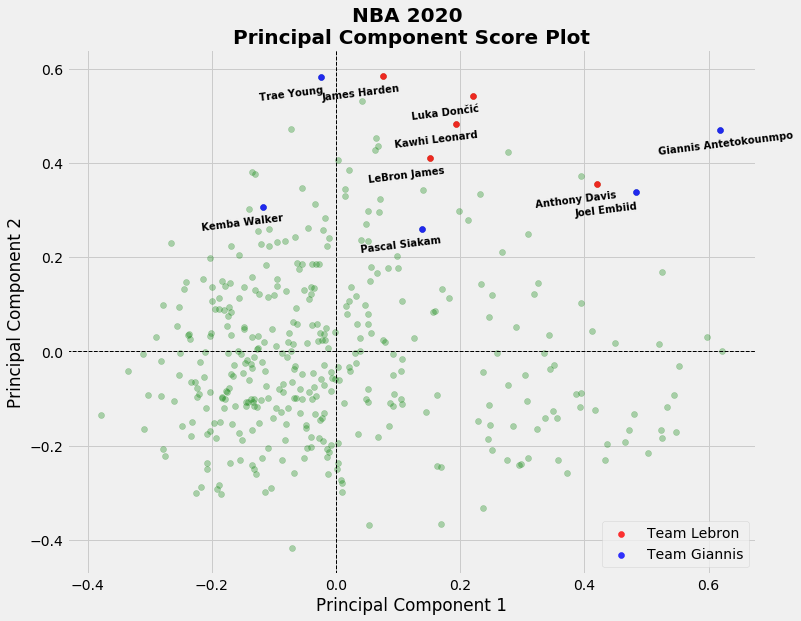

In [371]:
# Plot these scores
plt.figure(figsize=(11,9))
############################################################################################
# Plot PC Scores

plt.scatter(x = current_2020_scores_dat['PC1'], y = current_2020_scores_dat['PC2'],
               alpha = 0.3, c = "green", )


# Add grid lines
plt.axhline(0, color='black', linestyle = "--", linewidth = 1.0)
plt.axvline(0, color='black', linestyle = "--", linewidth = 1.0)

# Set axes limits
#plt.xlim(-0.4, 0.4)   
#plt.ylim(-0.4, 1)  

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("NBA 2020 \nPrincipal Component Score Plot", fontsize=20, fontweight='bold')




# Emphasize team lebron vs. team giannis
team_lebron = ["LeBron James","James Harden", "Anthony Davis", "Kawhi Leonard", "Luka Dončić"]
players_to_emphasize = ["Giannis Antetokounmpo", "Joel Embiid", "Pascal Siakam", "Kemba Walker", "Trae Young"]


team_lebron = np.array(["LeBron James","James Harden", "Anthony Davis", "Kawhi Leonard", "Luka Dončić"])
team_giannis = np.array(["Giannis Antetokounmpo", "Joel Embiid", "Pascal Siakam", "Kemba Walker", "Trae Young"])


lebron_dat = current_2020_scores_dat[ current_2020_scores_dat.Player.isin(team_lebron) ]
giannis_dat = current_2020_scores_dat[ current_2020_scores_dat.Player.isin(team_giannis) ]


plt.scatter(x = lebron_dat['PC1'], y = lebron_dat['PC2'],
               alpha = 0.8, c = "red", label = "Team Lebron")

plt.scatter(x = giannis_dat['PC1'], y = giannis_dat['PC2'],
               alpha = 0.8, c = "blue", label = "Team Giannis")



# Add labels to names in team lebron or team Giannis
total_dat = pd.concat([lebron_dat, giannis_dat])
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] - 0.1, 
                point['y'] - 0.05, str(point['val']),
                fontsize = 10,
                fontweight="bold", 
                rotation = 7)
        
label_point(total_dat.PC1, total_dat.PC2, 
            current_2020_scores_dat.Player, plt.gca())


plt.legend(loc = "lower right")

plt.savefig("2020_score_plot.png", bbox_inches='tight')
plt.show()
